# DATA PREPROCESSING

## Importing the libraries

In [129]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn import metrics

## Importing Dataset

In [130]:
df = pd.read_csv('House_Data.csv')
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


## Handling Missing Data

In [131]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

## Value Counts

In [132]:
df['POSTED_BY'].value_counts()

POSTED_BY
Dealer     18291
Owner      10538
Builder      622
Name: count, dtype: int64

In [133]:
df['ADDRESS'].value_counts()

ADDRESS
Zirakpur,Chandigarh                   509
Whitefield,Bangalore                  230
Raj Nagar Extension,Ghaziabad         215
Sector-137 Noida,Noida                139
New Town,Kolkata                      131
                                     ... 
Ambika Township,Jivarajpark,Rajkot      1
Cheranalloor,Kochi                      1
Baba Nagar,Bangalore                    1
Barra Devi Naubasta road,Kanpur         1
E3-108, Lake View Recidency,,Vapi       1
Name: count, Length: 6899, dtype: int64

## Removing Duplicates

In [134]:
df.duplicated().sum()

401

In [135]:
df = df.drop_duplicates()

In [136]:
df.duplicated().sum()

0

## Label Encoding

In [137]:
label_encoder = LabelEncoder()

In [138]:
df['BHK_OR_RK'] = label_encoder.fit_transform(df['BHK_OR_RK'])

In [139]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,0,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,0,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,0,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,0,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,0,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


## One Hot Encoding

In [140]:
df = pd.get_dummies(df, columns=['POSTED_BY'], dtype=int)

In [141]:
df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
0,0,0,2,0,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0,0,1
1,0,0,2,0,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0,1,0
2,0,0,2,0,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0,0,1
3,0,1,2,0,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,0,0,1
4,1,0,2,0,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,0,1,0


## Creating New Feature

In [142]:
df['CITY'] = df['ADDRESS'].str.split(',').str[-1]
df = df.drop('ADDRESS', axis = 1)

In [143]:
df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,CITY
0,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0,0,0,1,Bangalore
1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0,0,1,0,Mysore
2,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0,0,0,1,Bangalore
3,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5,0,0,1,Ghaziabad
4,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5,0,1,0,Kolkata


In [144]:
df['CITY'] = label_encoder.fit_transform(df['CITY'])

In [145]:
df['BHK_SqFt'] = df['BHK_NO.'] * df['SQUARE_FT']

## Correlation with Target Variable

In [146]:
df.corr()['TARGET(PRICE_IN_LACS)']

UNDER_CONSTRUCTION       0.054618
RERA                     0.067314
BHK_NO.                  0.113654
BHK_OR_RK               -0.004453
SQUARE_FT                0.409571
READY_TO_MOVE           -0.054618
RESALE                  -0.203275
LONGITUDE               -0.030505
LATITUDE                -0.017813
TARGET(PRICE_IN_LACS)    1.000000
POSTED_BY_Builder        0.023836
POSTED_BY_Dealer         0.085308
POSTED_BY_Owner         -0.093488
CITY                     0.005901
BHK_SqFt                 0.397787
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [147]:
df.corr()['TARGET(PRICE_IN_LACS)']

UNDER_CONSTRUCTION       0.054618
RERA                     0.067314
BHK_NO.                  0.113654
BHK_OR_RK               -0.004453
SQUARE_FT                0.409571
READY_TO_MOVE           -0.054618
RESALE                  -0.203275
LONGITUDE               -0.030505
LATITUDE                -0.017813
TARGET(PRICE_IN_LACS)    1.000000
POSTED_BY_Builder        0.023836
POSTED_BY_Dealer         0.085308
POSTED_BY_Owner         -0.093488
CITY                     0.005901
BHK_SqFt                 0.397787
Name: TARGET(PRICE_IN_LACS), dtype: float64

## Heat Map

<Axes: >

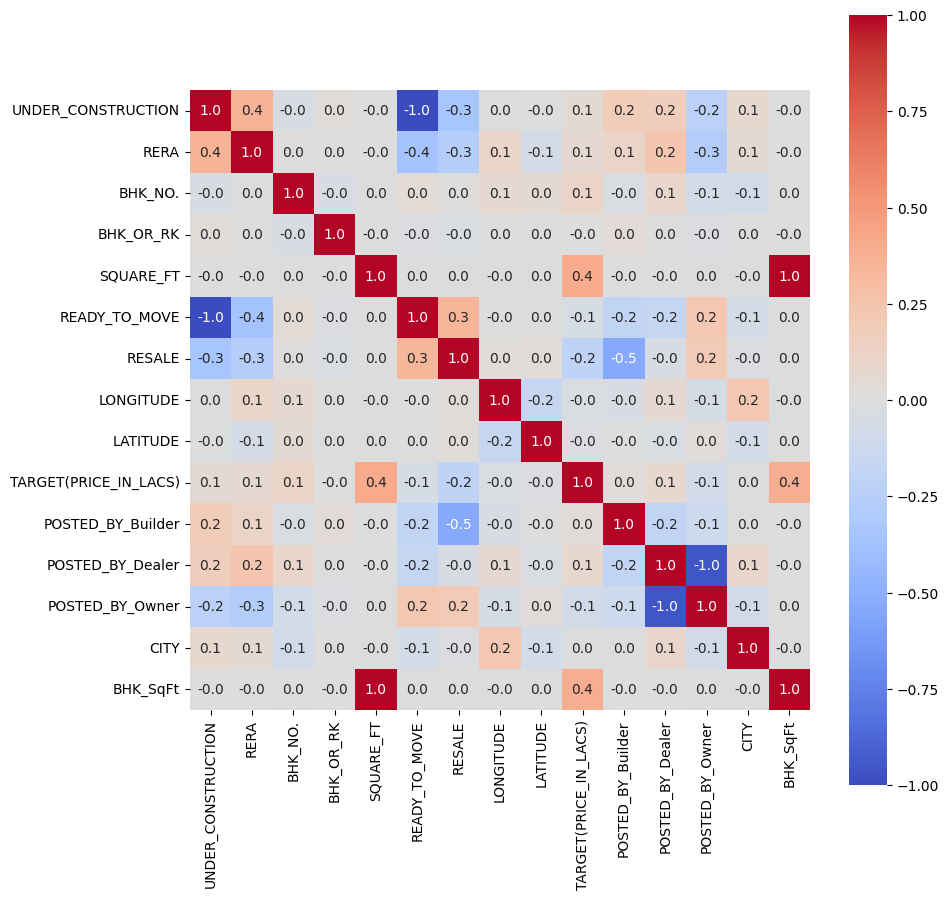

In [148]:
Correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(Correlation, cbar=True, square=True, fmt='.1f', annot= True, cmap = 'coolwarm')

## Checking Covariance between Relevant Attributes

In [149]:
X = df[[ 'BHK_SqFt', 'SQUARE_FT', 'BHK_NO.']]  # Select relevant columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


     Feature         VIF
0   BHK_SqFt  151.540364
1  SQUARE_FT  151.540749
2    BHK_NO.    1.000137


## Dropping Least Relevant Feature

In [150]:
df = df.drop('BHK_SqFt', axis=1)

In [151]:
df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,CITY
0,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0,0,0,1,21
1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0,0,1,0,160
2,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0,0,0,1,21
3,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5,0,0,1,78
4,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5,0,1,0,134


In [152]:
df = df.drop('CITY', axis=1)

## DistPlot

C:\Users\parth\AppData\Local\Temp\ipykernel_12664\2501502160.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TARGET(PRICE_IN_LACS)'])


<Axes: xlabel='TARGET(PRICE_IN_LACS)', ylabel='Density'>

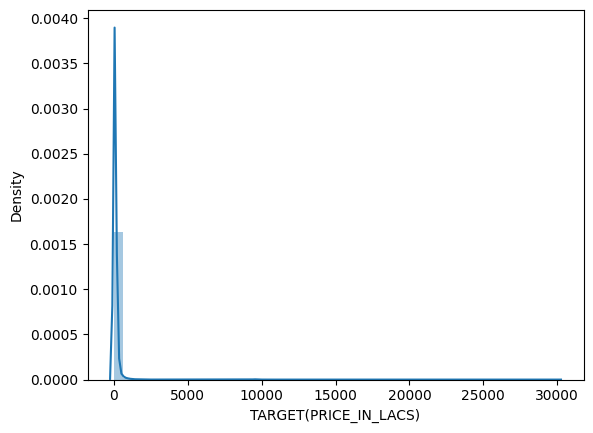

In [153]:
sns.distplot(df['TARGET(PRICE_IN_LACS)'])

In [154]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
count,29050.000000,29050.000000,29050.000000,29050.000000,2.905000e+04,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000
mean,0.178967,0.315869,2.390809,0.000826,2.003171e+04,0.821033,0.930361,21.270272,76.829585,141.712677,0.021308,0.618279,0.360413
std,0.383332,0.464869,0.880677,0.028732,1.914411e+06,0.383332,0.254541,6.195973,10.567572,650.055763,0.144412,0.485817,0.480129
min,0.000000,0.000000,1.000000,0.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,9.000000e+02,1.000000,1.000000,18.452663,73.794800,38.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,0.000000,1.172742e+03,1.000000,1.000000,20.631532,77.322873,61.750000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,3.000000,0.000000,1.550169e+03,1.000000,1.000000,26.886881,77.912934,100.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,20.000000,1.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000,1.000000,1.000000,1.000000


In [155]:
df.corr()['TARGET(PRICE_IN_LACS)']

UNDER_CONSTRUCTION       0.054618
RERA                     0.067314
BHK_NO.                  0.113654
BHK_OR_RK               -0.004453
SQUARE_FT                0.409571
READY_TO_MOVE           -0.054618
RESALE                  -0.203275
LONGITUDE               -0.030505
LATITUDE                -0.017813
TARGET(PRICE_IN_LACS)    1.000000
POSTED_BY_Builder        0.023836
POSTED_BY_Dealer         0.085308
POSTED_BY_Owner         -0.093488
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [156]:
df = df.drop('BHK_OR_RK', axis = 1)

## Feature Scaling

In [157]:
scaler = StandardScaler()

In [158]:
X = df.drop('TARGET(PRICE_IN_LACS)', axis = 1)
Y = df['TARGET(PRICE_IN_LACS)']

In [159]:
X.std()

UNDER_CONSTRUCTION    3.833315e-01
RERA                  4.648691e-01
BHK_NO.               8.806765e-01
SQUARE_FT             1.914411e+06
READY_TO_MOVE         3.833315e-01
RESALE                2.545413e-01
LONGITUDE             6.195973e+00
LATITUDE              1.056757e+01
POSTED_BY_Builder     1.444118e-01
POSTED_BY_Dealer      4.858171e-01
POSTED_BY_Owner       4.801286e-01
dtype: float64

In [160]:
Y.std()

650.0557632205616

In [161]:
X['SQUARE_FT'] = scaler.fit_transform(X[['SQUARE_FT']])

In [162]:
Y = scaler.fit_transform(Y.values.reshape(-1, 1))

In [163]:
X.std()

UNDER_CONSTRUCTION     0.383332
RERA                   0.464869
BHK_NO.                0.880677
SQUARE_FT              1.000017
READY_TO_MOVE          0.383332
RESALE                 0.254541
LONGITUDE              6.195973
LATITUDE              10.567572
POSTED_BY_Builder      0.144412
POSTED_BY_Dealer       0.485817
POSTED_BY_Owner        0.480129
dtype: float64

In [164]:
Y.std()

1.0

In [165]:
print(X)
print(Y)

       UNDER_CONSTRUCTION  RERA  BHK_NO.  SQUARE_FT  ...   LATITUDE  POSTED_BY_Builder  POSTED_BY_Dealer  POSTED_BY_Owner
0                       0     0        2  -0.009785  ...  77.597960                  0                 0                1
1                       0     0        2  -0.009798  ...  76.644605                  0                 1                0
2                       0     0        2  -0.009976  ...  77.632191                  0                 0                1
3                       0     1        2  -0.009978  ...  77.344500                  0                 0                1
4                       1     0        2  -0.009942  ...  88.484911                  0                 1                0
...                   ...   ...      ...        ...  ...        ...                ...               ...              ...
29446                   0     0        3  -0.009158  ...  78.043277                  0                 0                1
29447                   

## Test-Train Split

In [166]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2)

# Predictions

### USING XGBOOST

In [191]:
XG_Model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, subsample=0.9, colsample_bytree=0.4, random_state=42)
XG_Model.fit(X_Train, Y_Train)
XG_Train_Pred = XG_Model.predict(X_Train)
Score_R2_XG_Training = metrics.r2_score(Y_Train, XG_Train_Pred)
print(f"XGBoost R^2 Score on Training Dataset: {Score_R2_XG_Training}")
XG_Test_Pred = XG_Model.predict(X_Test)
Score_R2_XG_Testing = metrics.r2_score(Y_Test, XG_Test_Pred)
print(f"XGBoost R^2 Score on Testing Dataset: {Score_R2_XG_Testing}")


XGBoost R^2 Score on Training Dataset: 0.9646998801223465
XGBoost R^2 Score on Testing Dataset: 0.9377099326111343


### USING RANDOM FOREST

In [173]:
RandomForest = RandomForestRegressor()
RandomForest.fit(X_Train, Y_Train.ravel())
RandomForest_Training_Pred = RandomForest.predict(X_Train)
RandomForest_Testing_Pred = RandomForest.predict(X_Test)
RF_Training_Score = metrics.r2_score(Y_Train, RandomForest_Training_Pred)
RF_Testing_Score = metrics.r2_score(Y_Test, RandomForest_Testing_Pred)
print("Random Forest Score on Training Dataset = ", RF_Training_Score)
print("Random Forest Score on Testing Dataset = ", RF_Testing_Score)

Random Forest Score on Training Dataset =  0.9861267957661111
Random Forest Score on Testing Dataset =  0.9079012875674536


## Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
rf_model = RandomForestRegressor(random_state=42)
cv_scores = cross_val_score(rf_model, X_Train, Y_Train.ravel(), cv=5)
print(f"Cross-validation scores: {cv_scores}")


Cross-validation scores: [0.92885461 0.96505258 0.63831817 0.96593888 0.92868738]


### USING ADA-BOOST

In [174]:
base_regressor = DecisionTreeRegressor(max_depth=2)
ada_boost_model = AdaBoostRegressor(n_estimators=500, learning_rate=0.1, random_state=42)
ada_boost_model.fit(X_Train, Y_Train.ravel())
Y_train_pred = ada_boost_model.predict(X_Train)
Y_test_pred = ada_boost_model.predict(X_Test)
train_score = r2_score(Y_Train, Y_train_pred)
test_score = r2_score(Y_Test, Y_test_pred)

print(f"AdaBoost Train R^2 Score: {train_score}")
print(f"AdaBoost Test R^2 Score: {test_score}")


AdaBoost Train R^2 Score: 0.9061297704121793
AdaBoost Test R^2 Score: 0.9318424884157507


In [193]:
X.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
0,0,0,2,-0.009785,1,1,12.969910,77.597960,0,0,1
1,0,0,2,-0.009798,1,1,12.274538,76.644605,0,1,0
2,0,0,2,-0.009976,1,1,12.778033,77.632191,0,0,1
3,0,1,2,-0.009978,1,1,28.642300,77.344500,0,0,1
4,1,0,2,-0.009942,0,1,22.592200,88.484911,0,1,0


In [194]:
Y

array([[-0.13339497],
       [-0.13954839],
       [-0.15185524],
       ...,
       [-0.1763151 ],
       [-0.1149347 ],
       [-0.17523825]])

### Instance Check

In [195]:
instance = [[0,	0,	2,	-0.009785,	1,	1,	12.274538,	76.644605,	0,	0,	1]]
instance = np.array(instance)
pred  = XG_Model.predict(instance)
pred = np.array(pred).reshape(-1, 1)
final_pred = scaler.inverse_transform(pred)
print(final_pred)

[[53.917046]]
